# Python Tutorial

###### Here we import some modules that we will use for scientific computing and plotting 

In [136]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

Make and print a random matrix

In [3]:
x = -10 + 20*np.random.rand(2 , 2)
print(x)

[[ 9.39  9.23]
 [ 4.7   4.  ]]


Check matrix type

In [4]:
x.dtype

dtype('float64')

Can also cast matricies and arrays to different type

In [5]:
x.astype(int)

array([[9, 9],
       [4, 3]])

Defining a function (indentation is important) with defined in

In [6]:
def multiply_input(x,y=5):
    return x*y # note that this for matrix matrix or matrix-vector this is equivalent to .* in MATLAB 

In [7]:
multiply_input(x)

array([[ 46.94,  46.15],
       [ 23.52,  19.99]])

In [8]:
multiply_input(x,2)

array([[ 18.78,  18.46],
       [  9.41,   8.  ]])

Anonymous function using $\lambda$ operator

In [9]:
 f = lambda a, b : a + b

In [10]:
f(1,1)

2

Importing audio files

In [137]:
from scipy.io import wavfile 

In [250]:
fs, y = wavfile.read('/Volumes/SDHD/GD/Work/Python/Notebooks/Tutorials/test.wav')

In [251]:
from IPython.display import Audio
Audio(y, rate=fs)

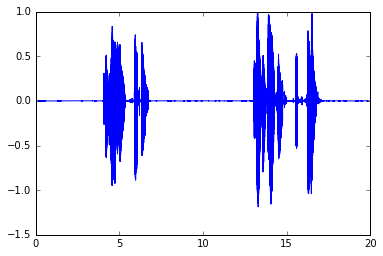

In [48]:
plt.plot(arange(0,len(y))/fs,y/y.max())

In [56]:
%matplotlib qt
plt.plot(arange(0,len(y))/fs,y/y.max())

In [64]:
%matplotlib inline

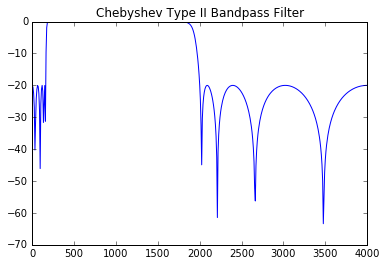

In [116]:
fs     = 8e3;  # sampling frequency
N      = 800;  
f_low   = 160;  # Lower band-edge: 160 Hz
f_high  = 2000; # Upper band-edge: 2000 Hz
delayS = 7;
Ast    = 20;   # 20 dB stopband attenuation
Nfilt  = 8;    # Filter order

nyquist_rate = 0.5 * fs
low = f_low / nyquist_rate
high = f_high / nyquist_rate

b, a = signal.cheby2(Nfilt, Ast, [low, high], 'bandpass', analog=False)
w, h = signal.freqz(b, a)
w = (w/pi)*(fs/2)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Chebyshev Type II Bandpass Filter')
plt.show()

#H = [zeros(delayS,1); log(0.99*rand(N-delayS,1)+0.01).* ...
#    sign(randn(N-delayS,1)).*exp(-0.01*(1:N-delayS)')]);
#H = H/norm(H);

# w = (w/pi)*(sim_param['fs']/2)
# fig = plt.figure()
# plt.title('Digital filter frequency response')
# ax1 = fig.add_subplot(111)
# plt.plot(w, 20 * np.log10(abs(h)), 'b')
# plt.ylabel('Amplitude [dB]', color='b')
# plt.xlabel('Frequency [rad/sample]')
# ax2 = ax1.twinx()
# angles = np.unwrap(np.angle(h))
# plt.plot(w, angles, 'g')
# plt.ylabel('Angle (radians)', color='g')
# plt.grid()
# plt.axis('tight')
# plt.show()


# >>> plt.xscale('log')
# >>> plt.title('Chebyshev Type II frequency response (rs=40)')
# >>> plt.xlabel('Frequency [radians / second]')
# >>> plt.ylabel('Amplitude [dB]')
# >>> plt.margins(0, 0.1)
# >>> plt.grid(which='both', axis='both')
# >>> plt.axvline(100, color='green') # cutoff frequency
# >>> plt.axhline(-40, color='green') # rs
# >>> plt.show()

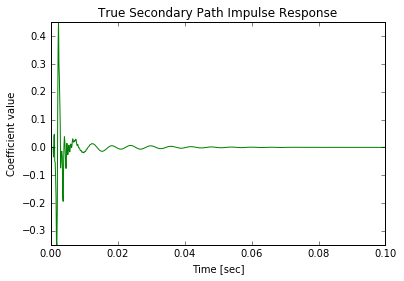

In [152]:
# Generate noise
noise_sig = np.concatenate((np.zeros(delayS), 
                    np.log(0.99*np.random.rand(N-delayS)+0.01)*np.sign(np.random.normal(0,1,N-delayS))*
                    np.exp(-0.1*arange(0,N-delayS))), axis=0)

# Filter noise to generate impulse response
H = lfilter(b,a,noise_sig)
H /= np.linalg.norm(H)

t = arange(0,N)/fs
plt.plot(t,H,color='g')
plt.ylabel('Coefficient value')
plt.xlabel('Time [sec]')
plt.title('True Secondary Path Impulse Response')
plt.axis('tight')
plt.show()

Estimating the Secondary Propagation Path

In [153]:
ntrS = 30000
s = np.random.normal(0,1,ntrS)

In [154]:
dS = lfilter(H,1,s) +  0.01*np.random.normal(0,1,ntrS);

Designing the Secondary Propagation Path Estimate with NLMS style filtering

In [243]:
M = 250;
muS = 0.1;
W = np.random.rand(M)
y = np.zeros(len(s))
error = y.copy()
for idx in range(M,len(dS)):
    error[idx] = dS[idx] - W.dot(s[idx:idx-M:-1])
    y[idx+M:idx:-1] = W.dot(s[idx:idx-M:-1])
    W += muS*error[idx]*s[idx:idx-M:-1]/np.linalg.norm(s[idx:idx-M:-1])

In [245]:
%matplotlib qt
n = range(0,len(s))
plt.plot(n, dS, 'r',n,y,'g', n, error, 'b')
plt.show()